In [2]:
import csv
import pandas as pd
from numpy import array
import numpy as np

import csv
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
from statistics import mean
from datetime import date
import datetime
import os
from sklearn.utils import check_array as check_arrays
import matplotlib.pyplot as plt

In [3]:
identify = 'TimeSeriesARIMA1test'
folder_name = '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/'+identify
#os.mkdir(folder_name)

# Load Dataset
df = pd.read_csv('datasets/Dataset_DailyPlays_DomainFeatures.csv', sep=';', index_col=0, decimal=',')
df = df.drop(columns=['Slope28', 'ArtistPopularity', 'Slope56','FirstWeek','Label 2'])

# Set dataset range
df_range = '160'
df = df.loc[:, :df_range]

list_of_test_songs = ['Katy Perry - Never Really Over' , 
              'Taylor Swift - You Need To Calm Down', 
              'Shawn Mendes & Camila Cabello - SeÃ±orita', 
              'Ava Max - So Am I', 
              'Andreas Bourani - Auf uns', 
              'Meduza feat. Goodboys - Piece Of Your Heart', 
              'Pietro Lombardi - Nur Ein Tanz', 
              'Loud Luxury feat. brando - Body', 
              'Mark Forster - Sowieso', 
              'Camila Cabello feat. Young Thug - Havana',  ] 

df = df.loc[list_of_test_songs]

df

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Katy Perry - Never Really Over,145,204,222,250,182,300,391,376,377,349,...,68,89,87,59,98,109,81,129,76,74
Taylor Swift - You Need To Calm Down,70,109,202,210,222,199,205,226,297,362,...,155,147,148,172,160,134,147,197,123,146
Shawn Mendes & Camila Cabello - SeÃ±orita,322,640,569,659,666,744,750,769,781,835,...,664,592,575,574,509,527,534,509,563,468
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,705,756,705,667,734,687,713,757,706,774
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,608,601,636,612,608,594,599,634,567,621
Meduza feat. Goodboys - Piece Of Your Heart,3,0,0,4,1,1,0,10,8,10,...,562,570,689,626,597,653,654,684,703,790
Pietro Lombardi - Nur Ein Tanz,23,36,31,42,46,41,55,55,58,55,...,9,6,7,11,9,8,7,8,7,6
Loud Luxury feat. brando - Body,8,0,2,1,0,1,5,13,3,5,...,39,41,41,46,55,40,42,36,41,42
Mark Forster - Sowieso,31,47,61,75,97,120,118,120,144,136,...,1207,1256,1157,1238,1175,1144,1336,1172,1186,1272
Camila Cabello feat. Young Thug - Havana,74,117,99,143,123,128,126,147,126,153,...,907,852,846,876,799,794,842,831,792,773


In [4]:
n_steps_in = 28
number_of_total_days = 112
n_steps_out = number_of_total_days - n_steps_in


# define the train data input and output
train_input = df.iloc[:, 0:n_steps_in]
first_song = train_input.loc['Katy Perry - Never Really Over']
test_output_data = df.iloc[:, n_steps_in:number_of_total_days]
test_output = array(test_output_data)
print(first_song)


1     145
2     204
3     222
4     250
5     182
6     300
7     391
8     376
9     377
10    349
11    406
12    418
13    417
14    383
15    404
16    453
17    396
18    550
19    443
20    576
21    447
22    530
23    545
24    587
25    551
26    623
27    601
28    551
Name: Katy Perry - Never Really Over, dtype: int64


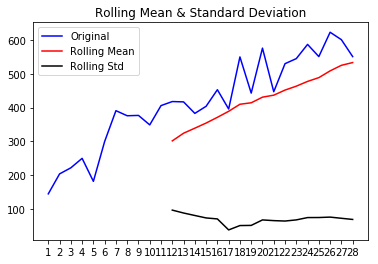

Results of Dickey-Fuller Test:
p-value = 0.4773. The series is likely non-stationary.
Test Statistic                 -1.611192
p-value                         0.477350
#Lags Used                      1.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


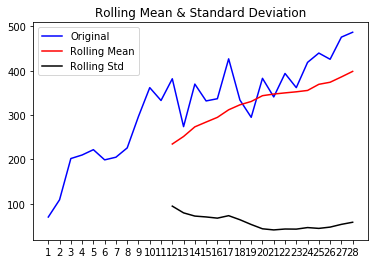

Results of Dickey-Fuller Test:
p-value = 0.7200. The series is likely non-stationary.
Test Statistic                 -1.087649
p-value                         0.719972
#Lags Used                      2.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


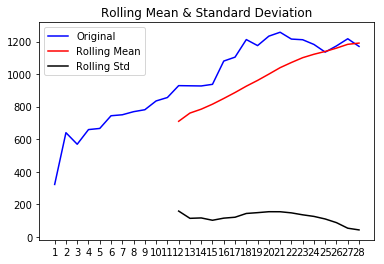

Results of Dickey-Fuller Test:
p-value = 0.0344. The series is likely non-stationary.
Test Statistic                 -3.005597
p-value                         0.034375
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


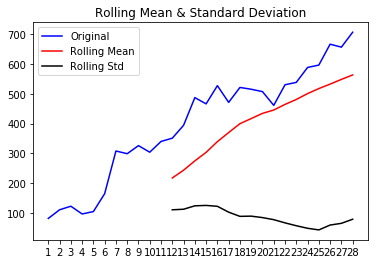

Results of Dickey-Fuller Test:
p-value = 0.8221. The series is likely non-stationary.
Test Statistic                 -0.789787
p-value                         0.822104
#Lags Used                      2.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


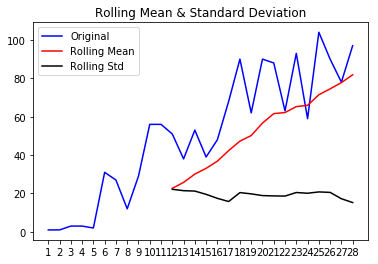

Results of Dickey-Fuller Test:
p-value = 0.3722. The series is likely non-stationary.
Test Statistic                 -1.816611
p-value                         0.372246
#Lags Used                     10.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


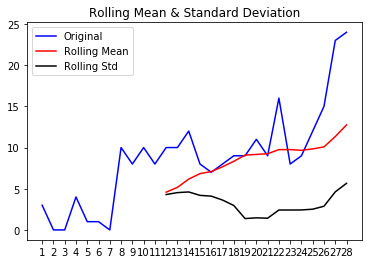

Results of Dickey-Fuller Test:
p-value = 0.8290. The series is likely non-stationary.
Test Statistic                 -0.765670
p-value                         0.828999
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


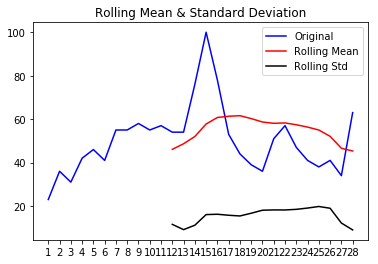

Results of Dickey-Fuller Test:
p-value = 0.0715. The series is likely non-stationary.
Test Statistic                 -2.714955
p-value                         0.071486
#Lags Used                      1.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


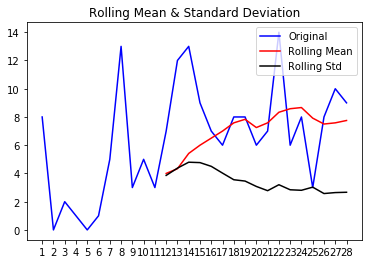

Results of Dickey-Fuller Test:
p-value = 0.2505. The series is likely non-stationary.
Test Statistic                 -2.085158
p-value                         0.250524
#Lags Used                      3.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


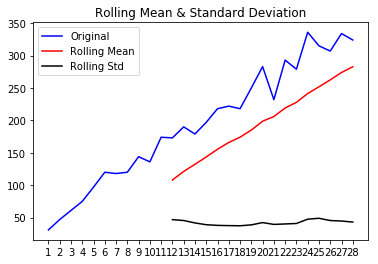

Results of Dickey-Fuller Test:
p-value = 0.6880. The series is likely non-stationary.
Test Statistic                 -1.166077
p-value                         0.688016
#Lags Used                      4.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


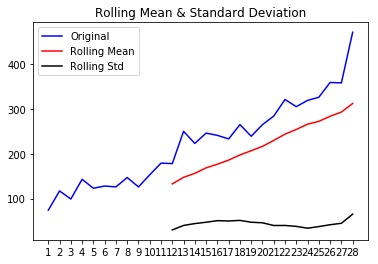

Results of Dickey-Fuller Test:
p-value = 0.9975. The series is likely non-stationary.
Test Statistic                  1.497528
p-value                         0.997515
#Lags Used                      1.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


In [5]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(6, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 10 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

for i in list_of_test_songs: 
    song = train_input.loc[i]
    test_stationarity(song)



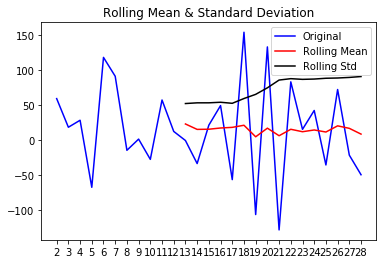

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.050102e+01
p-value                        1.083997e-18
#Lags Used                     0.000000e+00
Number of Observations Used    2.600000e+01
Critical Value (1%)           -3.711212e+00
Critical Value (5%)           -2.981247e+00
Critical Value (10%)          -2.630095e+00
dtype: float64


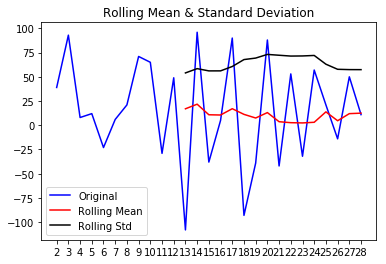

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                 -5.117571
p-value                         0.000013
#Lags Used                      1.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


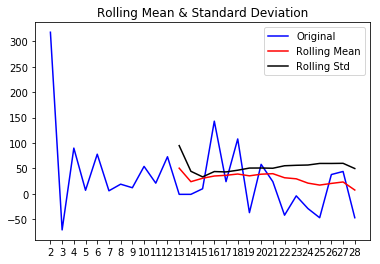

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.022221e+01
p-value                        5.288415e-18
#Lags Used                     0.000000e+00
Number of Observations Used    2.600000e+01
Critical Value (1%)           -3.711212e+00
Critical Value (5%)           -2.981247e+00
Critical Value (10%)          -2.630095e+00
dtype: float64


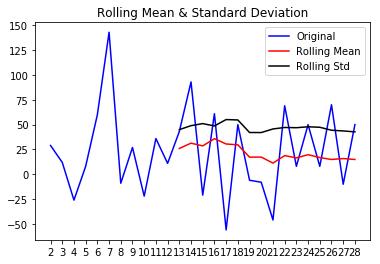

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.467684e+00
p-value                        1.392056e-08
#Lags Used                     0.000000e+00
Number of Observations Used    2.600000e+01
Critical Value (1%)           -3.711212e+00
Critical Value (5%)           -2.981247e+00
Critical Value (10%)          -2.630095e+00
dtype: float64


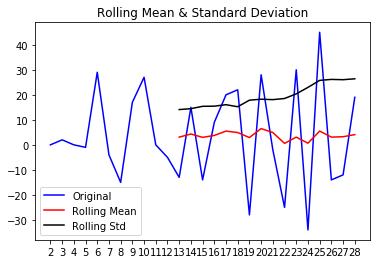

Results of Dickey-Fuller Test:
p-value = 0.0500. The series is likely non-stationary.
Test Statistic                 -2.861788
p-value                         0.049975
#Lags Used                      9.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


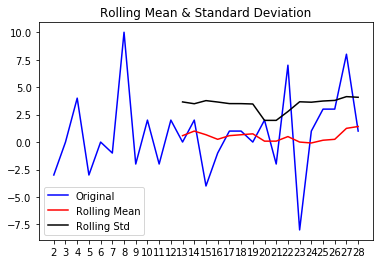

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.951708e+00
p-value                        9.655143e-10
#Lags Used                     0.000000e+00
Number of Observations Used    2.600000e+01
Critical Value (1%)           -3.711212e+00
Critical Value (5%)           -2.981247e+00
Critical Value (10%)          -2.630095e+00
dtype: float64


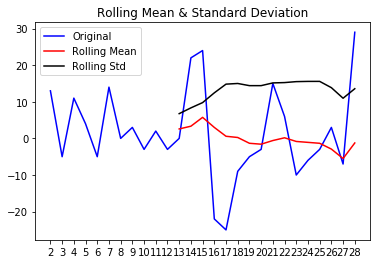

Results of Dickey-Fuller Test:
p-value = 0.0046. The series is likely stationary.
Test Statistic                 -3.665644
p-value                         0.004623
#Lags Used                      1.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


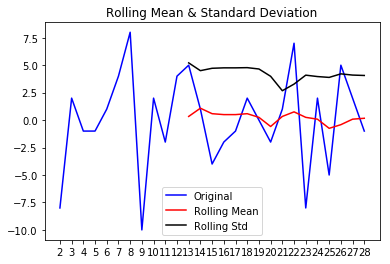

Results of Dickey-Fuller Test:
p-value = 0.0001. The series is likely stationary.
Test Statistic                 -4.679272
p-value                         0.000092
#Lags Used                      3.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


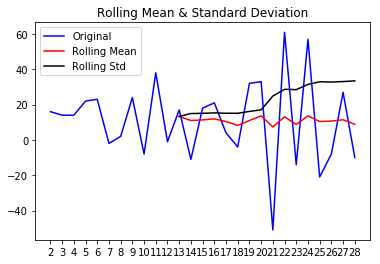

Results of Dickey-Fuller Test:
p-value = 0.0004. The series is likely stationary.
Test Statistic                 -4.345949
p-value                         0.000370
#Lags Used                      3.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


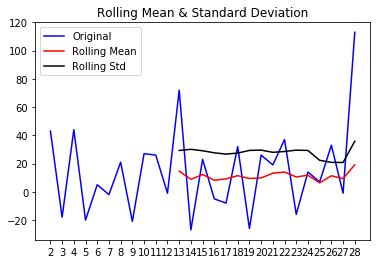

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -7.715335e+00
p-value                        1.232583e-11
#Lags Used                     0.000000e+00
Number of Observations Used    2.600000e+01
Critical Value (1%)           -3.711212e+00
Critical Value (5%)           -2.981247e+00
Critical Value (10%)          -2.630095e+00
dtype: float64


In [6]:
songs_first_diff = []

for i in list_of_test_songs: 
    song = train_input.loc[i]
    first_diff = song - song.shift(1)
    first_diff = first_diff.dropna(inplace = False)
    test_stationarity(first_diff, window = 12)
    songs_first_diff.append(first_diff)

/Users/clausholm/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


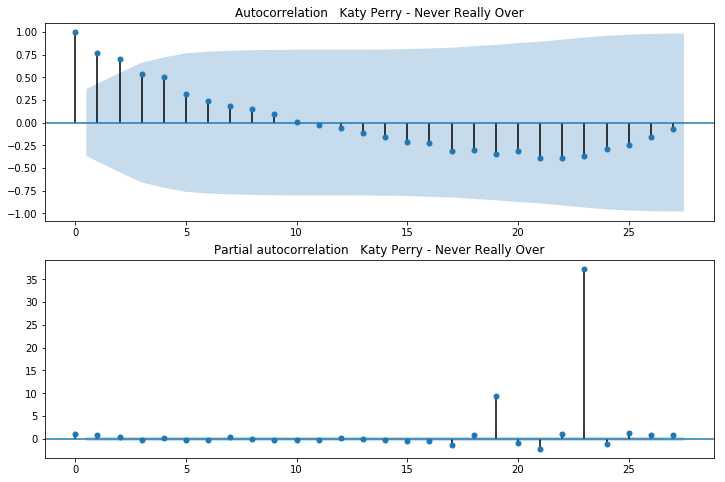

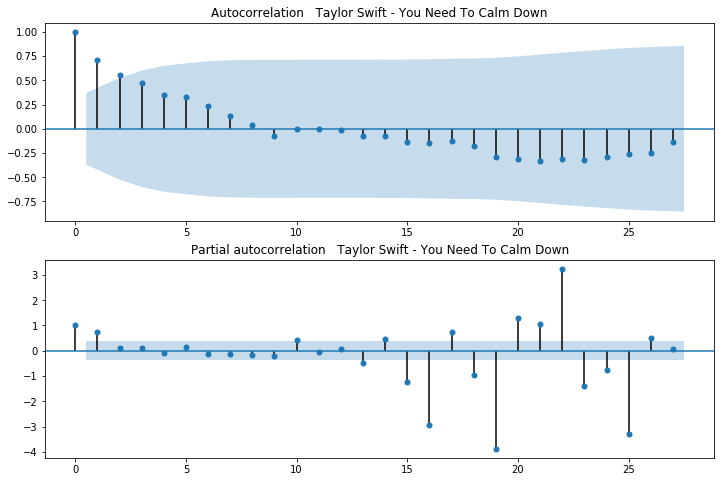

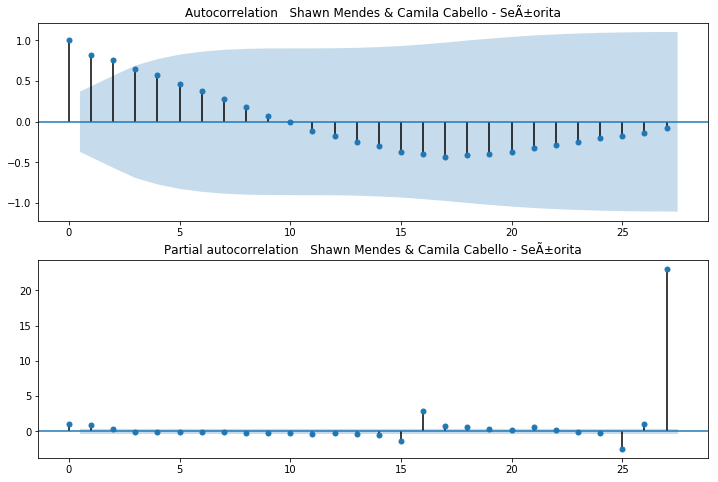

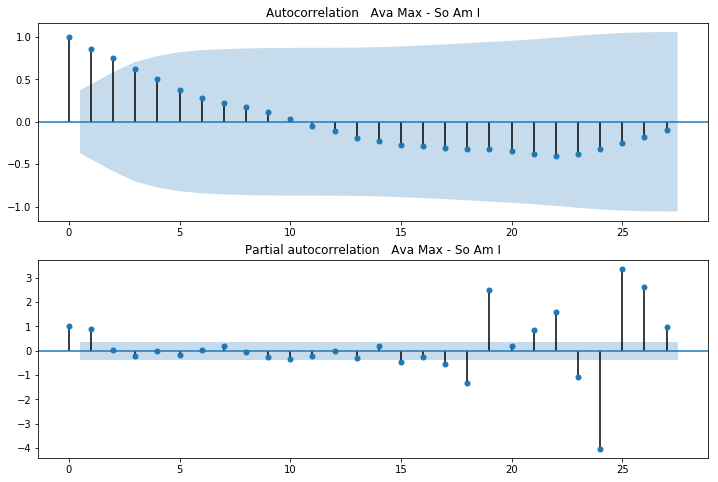

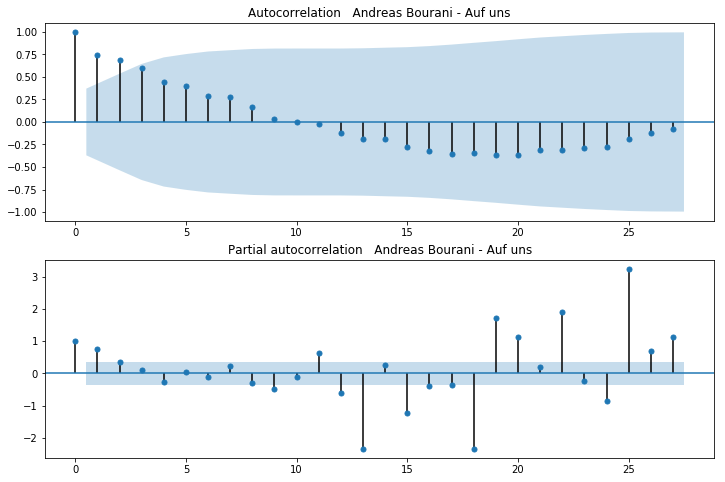

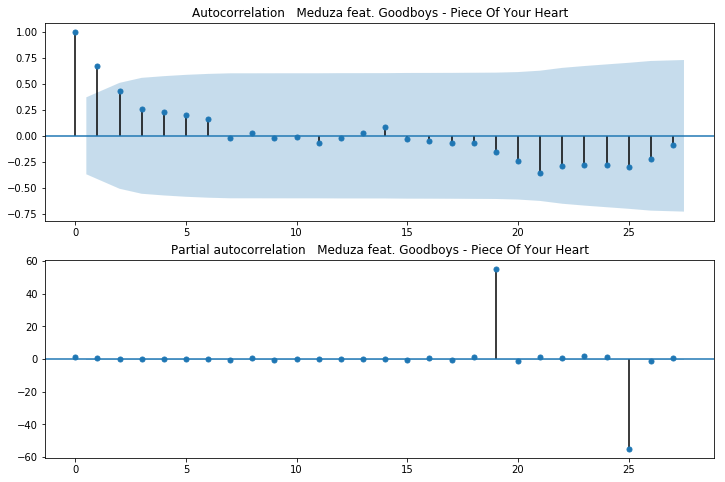

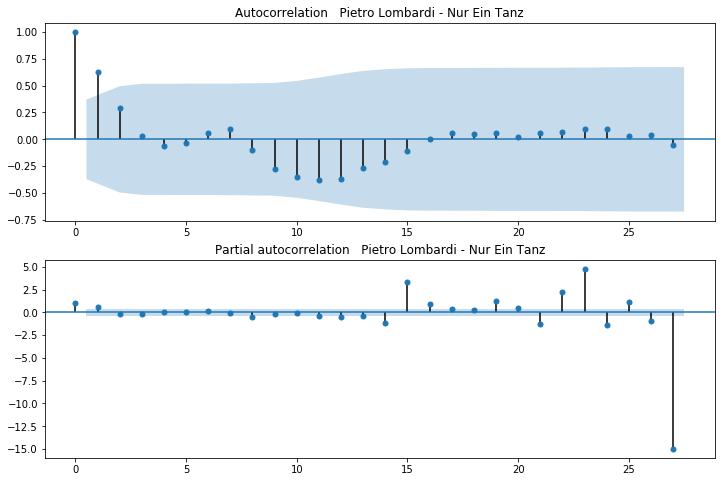

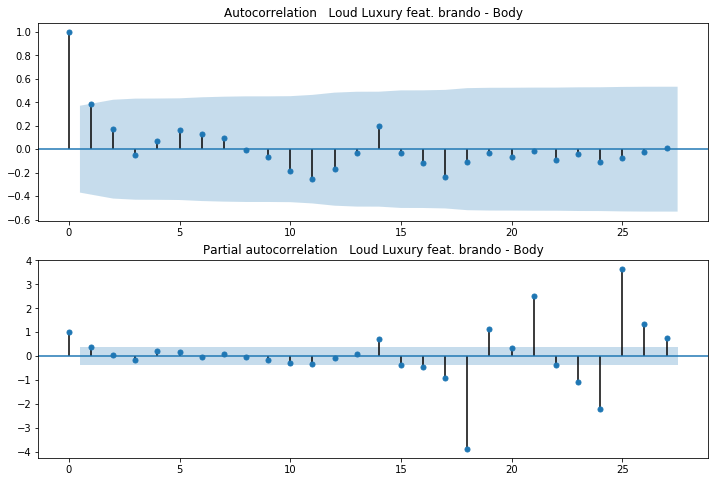

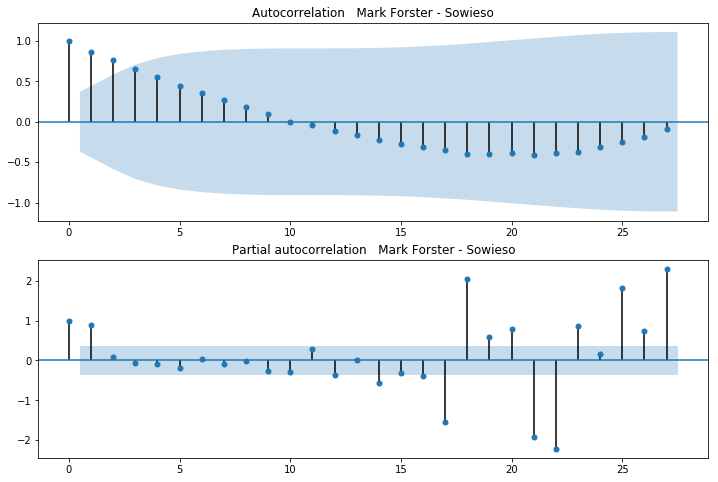

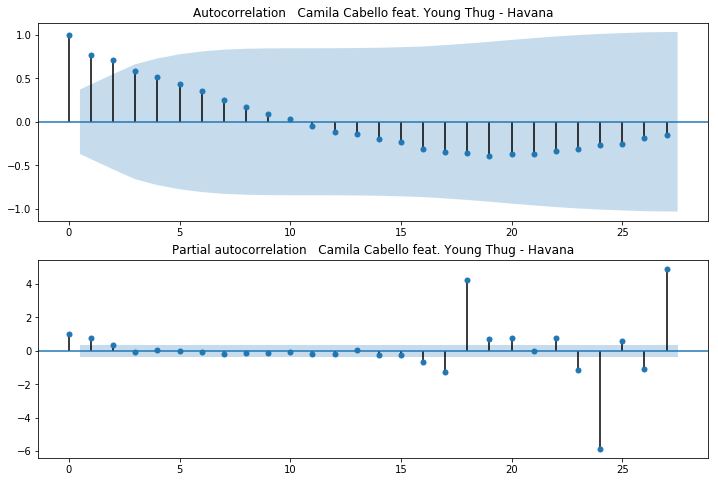

In [7]:
import statsmodels.api as sm

for i in list_of_test_songs: 
    song = train_input.loc[i]
    
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(song, lags=27, ax=ax1, title=('Autocorrelation   '+str(song.name))) # 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(song, lags=27, ax=ax2, title=('Partial autocorrelation   '+str(song.name)))# , lags=40

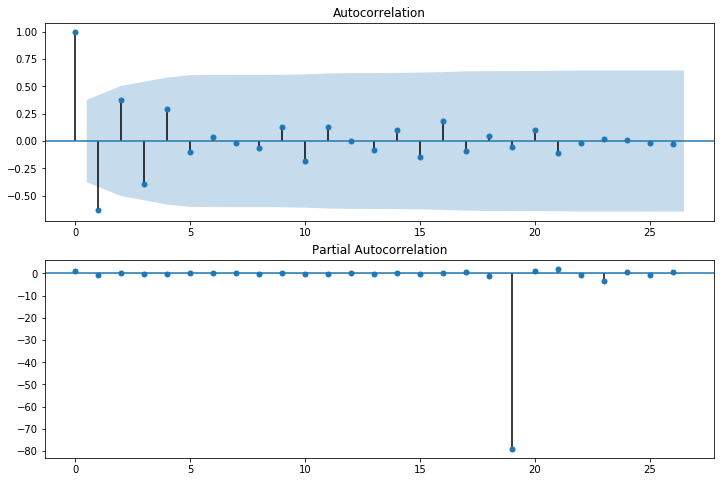

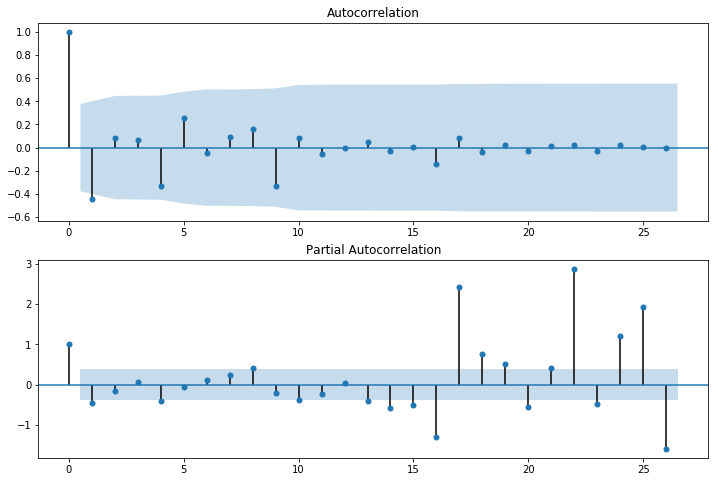

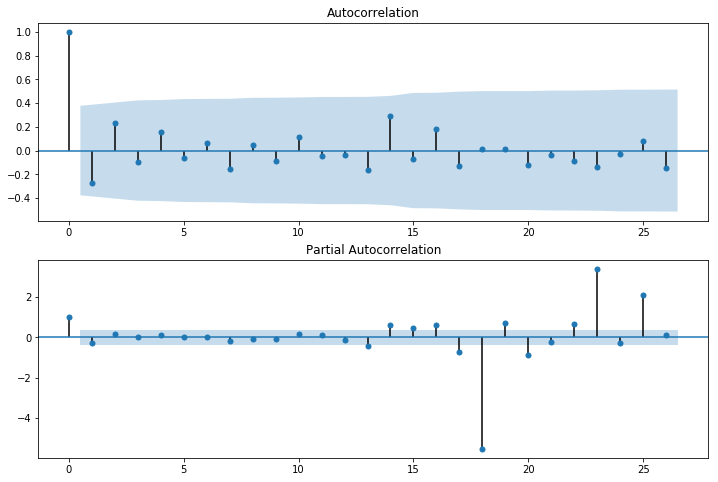

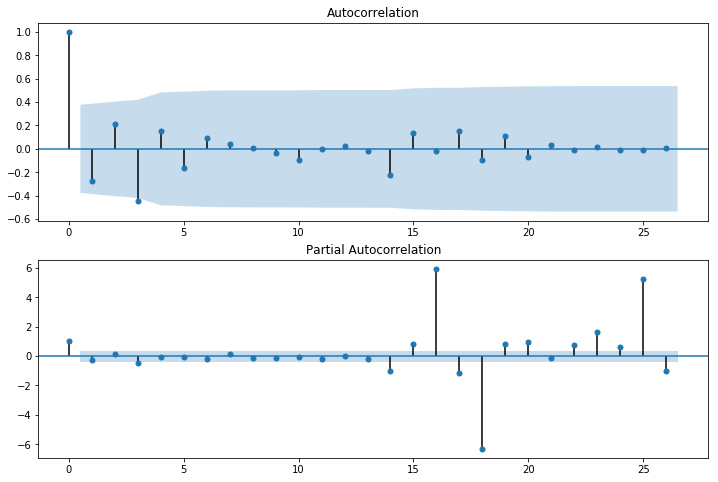

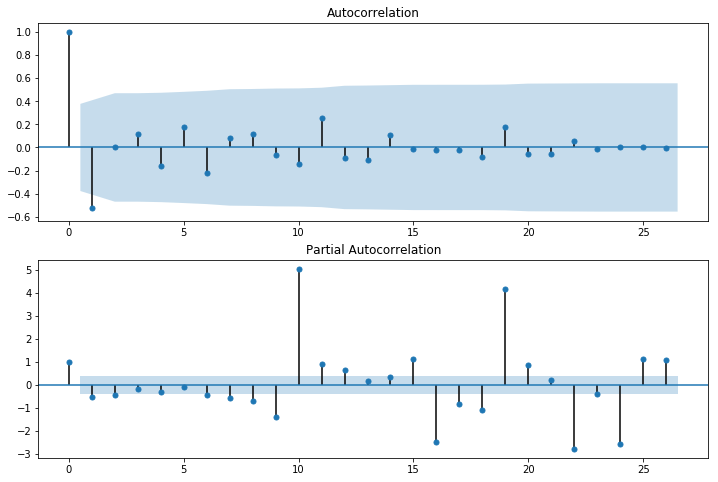

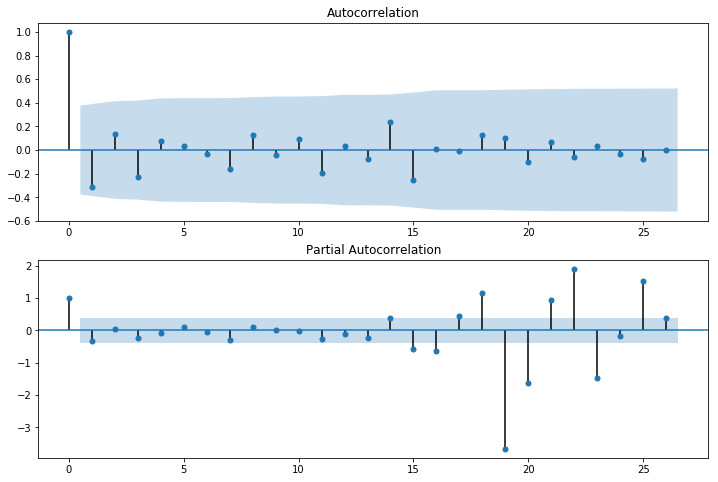

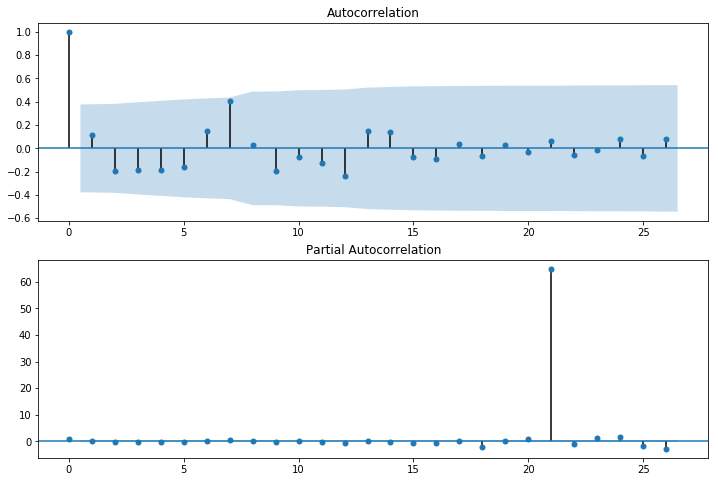

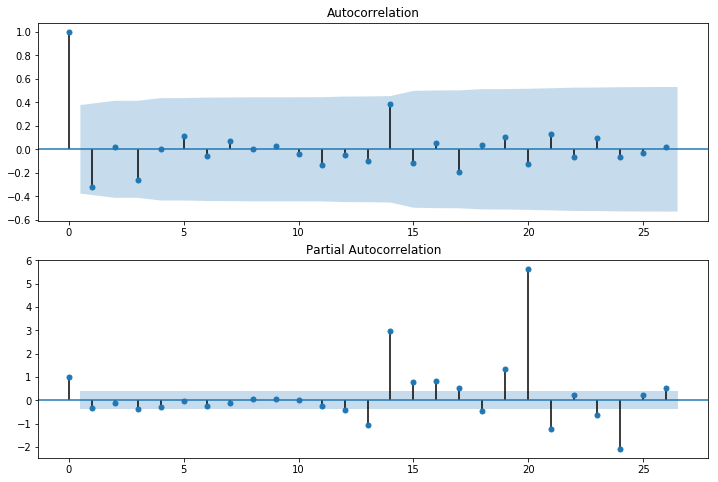

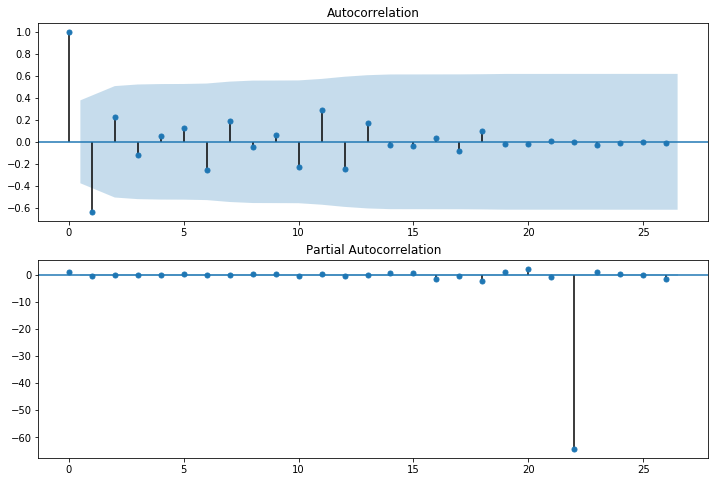

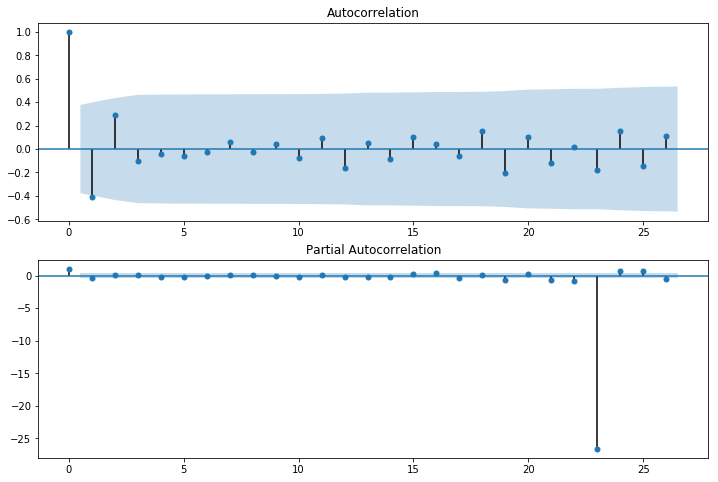

In [8]:
for i in songs_first_diff: 
    first_diff = i
    #print(songs_first_diff)
    
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(first_diff, lags=26, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(first_diff, lags=26, ax=ax2)

In [9]:
orders = [[], [], [], [], [], [], [], [], [], []]

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

yhat_final_list = []

for i in range(len(list_of_test_songs)):  
    
    data = train_input.loc[list_of_test_songs[i]]
    data = data.values.tolist()
    
    yhat_list = []

    for ii in range(n_steps_out):
        # ARIMA example
        model = ARIMA(data, order=(5, 1, 0))
        model_fit = model.fit(disp=False)
        # make prediction
        yhat = model_fit.predict(len(data), len(data), typ='levels')
        data.append(yhat[0])
        yhat_list.append(yhat[0])

    yhat_final_list.append(yhat_list)

yhat = yhat_final_list
print(yhat)


/Users/clausholm/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[[616.9803721918512, 623.4446693940183, 665.0529119958295, 646.4862178433153, 672.5329501973954, 686.9301495740733, 711.0788919624945, 722.2651366921154, 734.9573984458711, 752.1502506769594, 768.7883919369782, 785.843463509809, 799.513003649895, 815.560174164124, 831.2635095109123, 847.7446080435253, 863.1155656579188, 878.6547098986249, 894.3811766569329, 910.2675374003227, 926.0792378469383, 941.6887381549055, 957.4085543876847, 973.1481176426252, 988.9433210091079, 1004.6543768674153, 1020.3713058887882, 1036.0979025317026, 1051.8473674249947, 1067.5871181966963, 1083.3131803224258, 1099.0428186237089, 1114.777210027775, 1130.515714156225, 1146.2481748960256, 1161.9799682758492, 1177.7124118021338, 1193.4471692148759, 1209.1811445392282, 1224.9140111894444, 1240.6467946811642, 1256.3801239228835, 1272.113792638384, 1287.8470183397146, 1303.5800531125496, 1319.313116420572, 1335.046386906798, 1350.7795989597769, 1366.512686450075, 1382.2457271227258, 1397.9788046303127, 1413.7119020

In [11]:
#import numpy as np 

lst1 = [test_output[0], yhat[0]]
lst2 = [test_output[1], yhat[1]]
lst3 = [test_output[2], yhat[2]]
lst4 = [test_output[3], yhat[3]]
lst5 = [test_output[4], yhat[4]]
lst6 = [test_output[5], yhat[5]]
lst7 = [test_output[6], yhat[6]]
lst8 = [test_output[7], yhat[7]]
lst9 = [test_output[8], yhat[8]]
lst10 = [test_output[9], yhat[9]]

daysOrWeeks = 'Days'

df1 = pd.DataFrame(lst1).T
df1.columns = ['True', 'Predicted']
df1[daysOrWeeks] = df1.index + n_steps_in
df1.set_index(daysOrWeeks,inplace=True)

df2 = pd.DataFrame(lst2).T
df2.columns = ['True', 'Predicted']
df2[daysOrWeeks] = df2.index + n_steps_in
df2.set_index(daysOrWeeks,inplace=True)

df3 = pd.DataFrame(lst3).T
df3.columns = ['True', 'Predicted']
df3[daysOrWeeks] = df3.index + n_steps_in
df3.set_index(daysOrWeeks,inplace=True)

df4 = pd.DataFrame(lst4).T
df4.columns = ['True', 'Predicted']
df4[daysOrWeeks] = df4.index + n_steps_in
df4.set_index(daysOrWeeks,inplace=True)

df5 = pd.DataFrame(lst5).T
df5.columns = ['True', 'Predicted']
df5[daysOrWeeks] = df5.index + n_steps_in
df5.set_index(daysOrWeeks,inplace=True)

df6 = pd.DataFrame(lst6).T
df6.columns = ['True', 'Predicted']
df6[daysOrWeeks] = df6.index + n_steps_in
df6.set_index(daysOrWeeks,inplace=True)

df7 = pd.DataFrame(lst7).T
df7.columns = ['True', 'Predicted']
df7[daysOrWeeks] = df7.index + n_steps_in
df7.set_index(daysOrWeeks,inplace=True)

df8 = pd.DataFrame(lst8).T
df8.columns = ['True', 'Predicted']
df8[daysOrWeeks] = df8.index + n_steps_in
df8.set_index(daysOrWeeks,inplace=True)

df9 = pd.DataFrame(lst9).T
df9.columns = ['True', 'Predicted']
df9[daysOrWeeks] = df9.index + n_steps_in
df9.set_index(daysOrWeeks,inplace=True)

df10 = pd.DataFrame(lst10).T
df10.columns = ['True', 'Predicted']
df10[daysOrWeeks] = df10.index + n_steps_in
df10.set_index(daysOrWeeks,inplace=True)

#df1

In [12]:
# Forecast Error (or Residual Forecast Error)
forecast_errors = [test_output[i]-yhat[i] for i in range(len(test_output))]
#print('Forecast Errors: %s' % forecast_errors)  

df_result = pd.DataFrame(columns=['Song', 'Date', 'Bias', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSPE', 'Predict_from', 'Predict_to'])

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_square_percentage_error(y_true, y_pred):
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100
    return loss

for i in range(len(test_output)):
    print(list_of_test_songs[i])

    # Mean Forecast Error (or Forecast Bias), Mean Absolute Error, Mean Squared Error, Root Mean Squared Error  
    bias = mean(forecast_errors[i])
    mae = mean(abs(forecast_errors[i]))
    mape = mean_absolute_percentage_error(test_output[i], yhat[i])
    mse = mean_squared_error(test_output[i], yhat[i]) 
    rmse = sqrt(mse)
    rmspe = root_mean_square_percentage_error(test_output[i], yhat[i])
    df_result = df_result.append({'Date': date.today(),'Song': list_of_test_songs[i], 'Bias': bias, 'MAE': mae, 'MAPE': mape, 'MSE': mse, 'RMSE': rmse, 'RMSPE': rmspe, 'Predict_from':n_steps_in, 'Predict_to': number_of_total_days}, ignore_index=True)
    
    print('Bias: %f' % bias)
    print('MAE: %f' % mae)
    print('MAPE: %f'% mape)
    print('MSE: %f' % mse)
    print('RMSE: %f' % rmse)
    print('RMSPE %f' % rmspe)
    print('_________________________')

# Datetime    
now = datetime.datetime.now()
now = str(now.strftime("%Y-%m-%d %H:%M:%S"))
    
#df_result.to_csv(folder_name+'/'+identify+'_'+now+'.csv', sep=';', decimal=',' )

df_result


Katy Perry - Never Really Over
Bias: -633.867639
MAE: 636.368640
MAPE: 132.355939
MSE: 641163.709114
RMSE: 800.726988
RMSPE 202.850110
_________________________
Taylor Swift - You Need To Calm Down
Bias: -505.755647
MAE: 505.755647
MAPE: 93.442651
MSE: 359607.740609
RMSE: 599.673028
RMSPE 113.841248
_________________________
Shawn Mendes & Camila Cabello - SeÃ±orita
Bias: -1253.628764
MAE: 1256.593435
MAPE: 114.869729
MSE: 2301863.767576
RMSE: 1517.189430
RMSPE 144.841192
_________________________
Ava Max - So Am I
Bias: -696.764014
MAE: 699.250936
MAPE: 69.104624
MSE: 730944.148492
RMSE: 854.952717
RMSPE 84.747822
_________________________
Andreas Bourani - Auf uns
Bias: 124.659738
MAE: 132.640512
MAPE: 32.732238
MSE: 25034.788646
RMSE: 158.223856
RMSPE 35.209574
_________________________
Meduza feat. Goodboys - Piece Of Your Heart
Bias: 89.484561
MAE: 89.484561
MAPE: 57.697788
MSE: 11604.505071
RMSE: 107.724208
RMSPE 58.863245
_________________________
Pietro Lombardi - Nur Ein Tanz


FileNotFoundError: [Errno 2] No such file or directory: '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/TimeSeriesARIMA1test/TimeSeriesARIMA1test_2020-06-04 13:50:13.csv'

In [ ]:
pred_title = "Prediction from "+ str(n_steps_in)+" to "+str(number_of_total_days)
fig_size = 1700

df1.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[0])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[0]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[0])
print(pred_title)
print('________________________________________________________________')

df2.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[1])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[1]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[1])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df3.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[2])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[2]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[2])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df4.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[3])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[3]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[3])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df5.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[4])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[4]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[4])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df6.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[5])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[5]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[5])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df7.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[6])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[6]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[6])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df8.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[7])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[7]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[7])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df9.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[8])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[8]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[8])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df10.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[9])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[9]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[9])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')
